## ggplot2의 그래픽 문법
> * `ggplot()` 함수 내에서 배경(figure)을 설정 - 사용할 데이터, 축에 대응되는 변수 설정
* `+`기호를 통해 그래픽 함수들을 연결할 수 있다
* 축 범위 설정 : `xlim(L,U), ylim(L,U)`
* 흔히 사용되는 그래프 종류는 아래와 같다.

|    함수 |   그래프   | 
|:----------------:|:----------------:|
| geom_point( ) | scatter plot |
| geom_col( ) | bar chart |
| geom_bar( ) | histogram |
| geom_line( ) | T.S plot |
| geom_boxplot( ) | box plot |

In [13]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
# figure size control function
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}

Warning message:
"Removed 105 rows containing missing values (geom_point)."

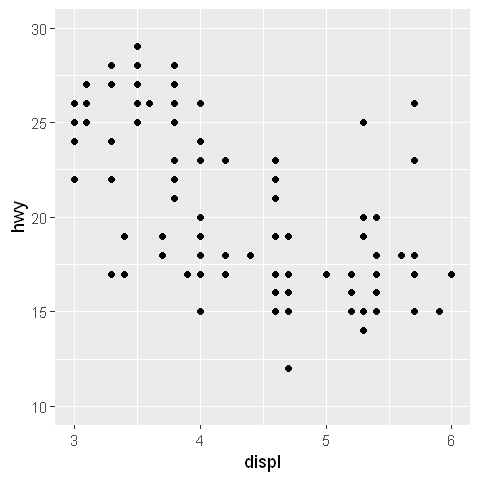

In [37]:
fig(4,4)
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3,6) + ylim(10, 30)

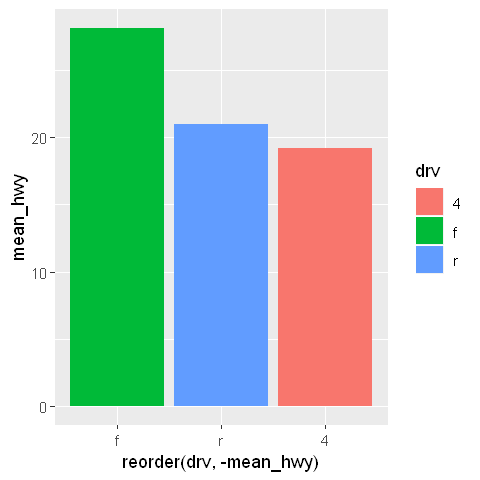

In [38]:
# 막대 그래프
drv_mean_hwy_df = mpg  %>% group_by(drv)  %>% summarize(mean_hwy = mean(hwy))

ggplot(data = drv_mean_hwy_df, aes(x = reorder(drv, -mean_hwy), y = mean_hwy, fill = drv)) + 
    geom_col() 

In [22]:
install.packages("gridExtra")
library(gridExtra)

package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpMpG8so\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



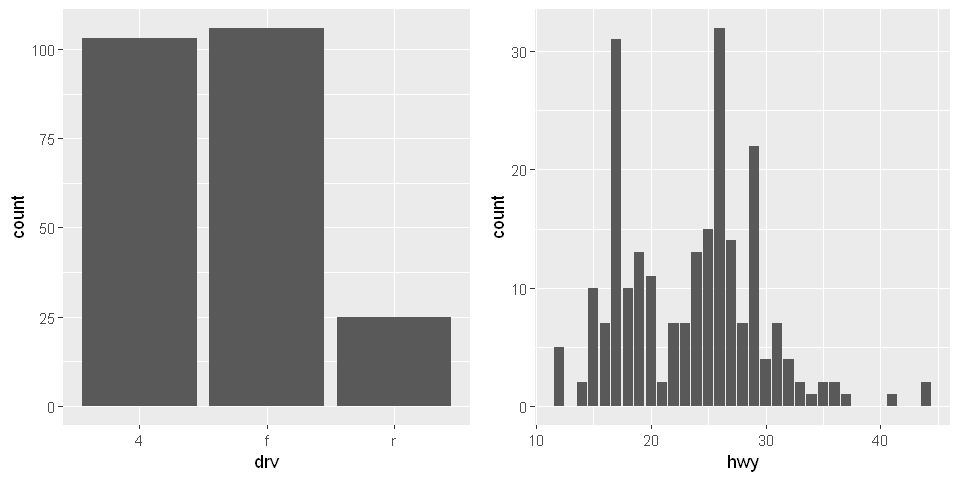

In [35]:
# 히스토그램
fig(8,4)
p1 = ggplot(data = mpg, aes(x = drv)) + geom_bar() 
p2 = ggplot(data = mpg, aes(x = hwy)) + geom_bar() 

grid.arrange(p1, p2, ncol = 2)

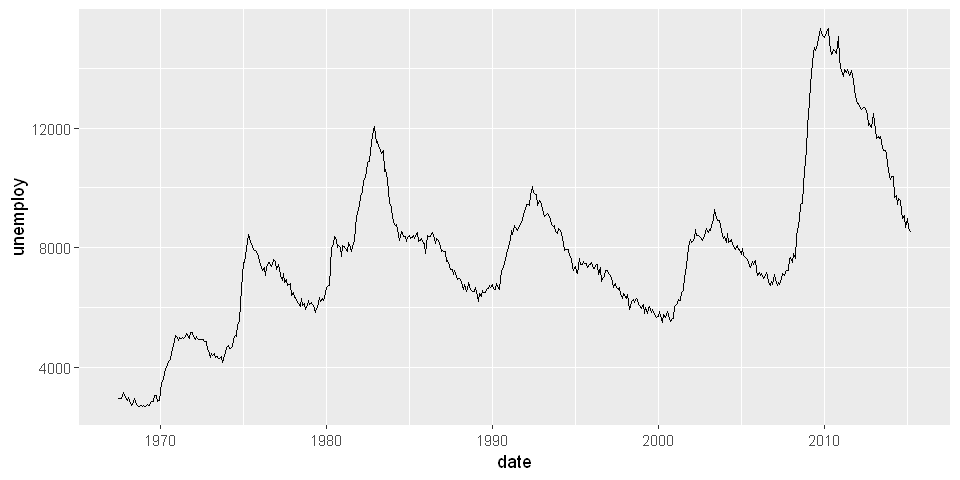

In [25]:
# line chart / time series plot
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()

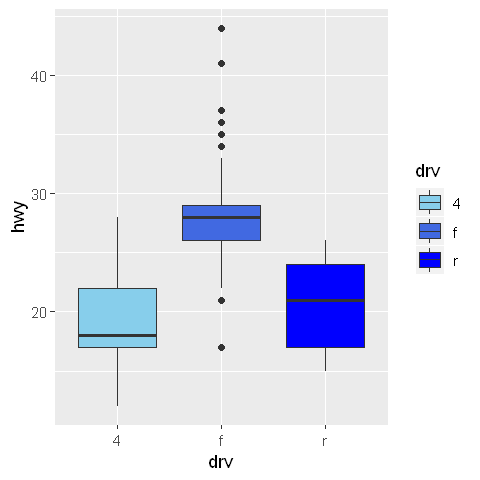

In [40]:
# box plot
fig(4,4)
bp <- ggplot(data = mpg, aes(x = drv, y = hwy, fill = drv)) + geom_boxplot()
bp + scale_fill_manual(values = c("skyblue",'royalblue','blue'))